For this assignment, you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you in D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. The second part of assignment 3 has 50 points.


## Exercise 
1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.



In [146]:
#imports
import pandas as pd
passengers = pd.read_csv("titanic.csv")
import seaborn as sns; sns.set(style="ticks", color_codes=True)

#info
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [147]:
#head (checking)
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Hypothesis 1 - The survival rate is associated to the class of passenger.

The hypothesis that the survival rate is associated with the class of the passenger is supported by the percentage values of the number of class 1,2 and 3 passengers who survived the Titanic. 

62.96% of passengers in Class 1 survived, and the percentage of survivors goes down as we go down the passenger classes, with 47.28% of Class 2 passengers and an ever lesser percentage of 24.24% of Class 3 passengers who survived.

In [148]:
#1 Determine if the survival rate is associated to the class of passenger
classPassengers = passengers.groupby('Pclass')

#gets the percentage of passengers that survived
classPassengers['Survived'].value_counts(normalize=True)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

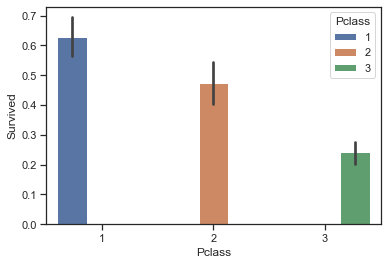

In [149]:
#plot
passengers["Pclass"] = passengers["Pclass"].astype('category')
sns.barplot(data=passengers, x='Pclass',y="Survived", hue="Pclass")

## Hypothesis 2 - The survival rate is associated to the gender
The hypothesis that the survival rate is associated with the gender of the passenger is also supported by the percentage values of the gender of the passengers who survived the Titanic. 

74.20% of the female passengers while only 18.89% of the male passengers survived.

In [126]:
#2 Determine if the survival rate is associated to the gender
mfPassengers = passengers.groupby('Sex')

#gets the percentage of passengers that survived
mfPassengers['Survived'].value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

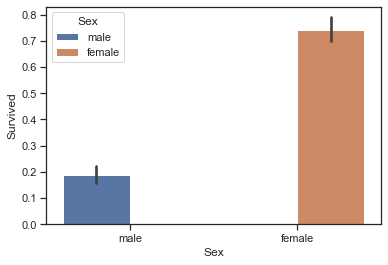

In [127]:
#plot
sns.barplot(data=passengers, x='Sex',y="Survived", hue="Sex")

## Hypothesis 3 - The survival rate is associated to the age
The hypothesis that the survival rate is associated with the age of the passenger is tested by binning the ages of the passengers by their decade range.

The resulting table shows a survival age that the survival rate of close to 40% for passengers in the 10 to 59 age ranges, with survival extremely high in the 0-9 age range and the extremely low in ages 50 onwards, giving the 

A possible theory for this difference between the 0-9 and the adult population, and the 60+ elderly population is the code of conduct where “women and children” are saved first in a disaster, and the decreased ability of elderly passengers to make their way to safety on lifeboats during the catastrophe.



In [176]:
#3 Determine the survival rate is associated to the age
#passengers.plot.scatter(x='PassengerId',y='Age',c='Survived')

#bin ages
ageBins=[0,10,20,30,40,50,60,70,80]
ageLabels=["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70+"]
passengers['binAge'] = pd.cut(passengers['Age'],bins=ageBins,labels=ageLabels)

agePassengers = passengers.groupby('binAge')

#gets the percentage of passengers that survived
agePassengers['Survived'].value_counts(normalize=True)

binAge  Survived
0-9     1           0.593750
        0           0.406250
10-19   0           0.617391
        1           0.382609
20-29   0           0.634783
        1           0.365217
30-39   0           0.554839
        1           0.445161
40-49   0           0.616279
        1           0.383721
50-59   0           0.595238
        1           0.404762
60-69   0           0.764706
        1           0.235294
70+     0           0.800000
        1           0.200000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='binAge', ylabel='Survived'>

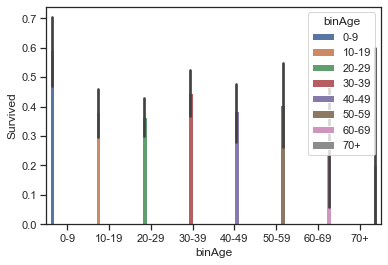

In [174]:
#plot
sns.barplot(data=passengers, x='binAge',y='Survived', hue="binAge")

### Github & D2L Submissions
Please create a **public** github repo and submit your answers on both **public github** and on **D2L**. Please include the link to your github repo in your submission. 

**Please follow the below guidelines regarding your github repository:**

The folder structure of your github account should be as followed:
                    
    ├── src                     # Source files (your python code)
    ├── data                    # Data related to the project (titanic.csv)
    ├── result                  # Result of the project (e.g., plots, reports)
    └── doc                     # Documentation files (additional documentations)

You must add **README.md** file to the root repository of your GitHub and explain all the directories in your GitHub repo in README file. Please look at this link as a [reference](https://help.github.com/en/github/creating-cloning-and-archiving-repositories/about-readmes) on how to write the README file.

Here is another great resource for organizing your folder and code on github. Reso

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, your final report and the structure of your github repo. 